# Credit Approval Prediction
### Done as a part of Data Mining

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
sns.set()

In [2]:
columns = ['X' + str(x) for x in range(1,16)]
columns.append('y')

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = columns)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
for column in columns:
    print('Variable :', column)
    print(f'# Unique values = {df[column].nunique()}')
    print(f'Unique values = {df[column].unique()}')

Variable : X1
# Unique values = 3
Unique values = ['b' 'a' '?']
Variable : X2
# Unique values = 350
Unique values = ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22

In [6]:
df.replace('?', np.nan, inplace = True)

In [7]:
df.isnull().sum()

X1     12
X2     12
X3      0
X4      6
X5      6
X6      9
X7      9
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14    13
X15     0
y       0
dtype: int64

In [8]:
df.dtypes

X1      object
X2      object
X3     float64
X4      object
X5      object
X6      object
X7      object
X8     float64
X9      object
X10     object
X11      int64
X12     object
X13     object
X14     object
X15      int64
y       object
dtype: object

In [9]:
df['X2'] = pd.to_numeric(df['X2'])

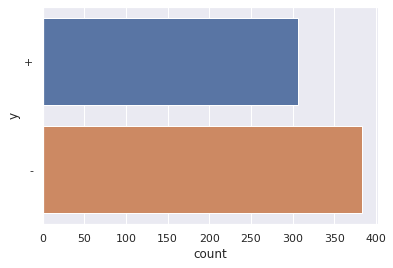

In [10]:
sns.countplot(data = df, y = 'y');

In [11]:
disc = [x for x in df.columns if x in df.loc[:,df.dtypes==np.object].columns]

for x in disc:
    df[x] = df[x].fillna(df[x].mode().iloc[0])

cont = [x for x in df.columns if x not in df.loc[:,df.dtypes==np.object].columns]

for x in cont:
    df[x] = df[x].fillna(df[x].mean())

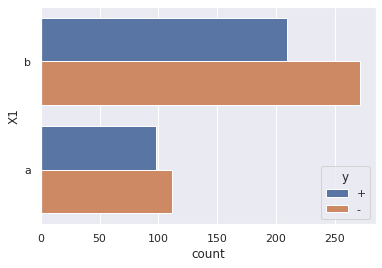

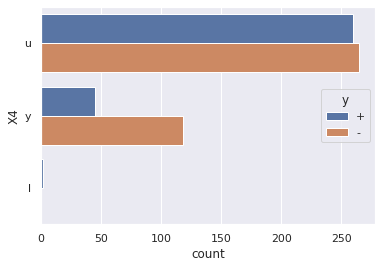

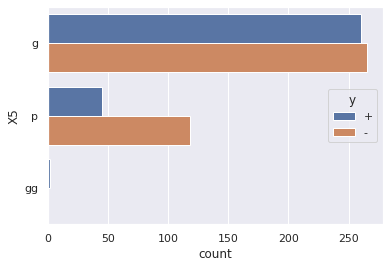

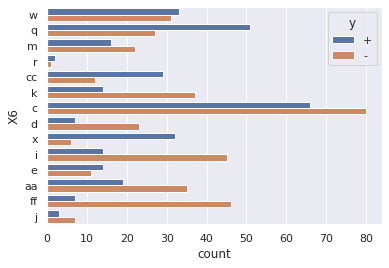

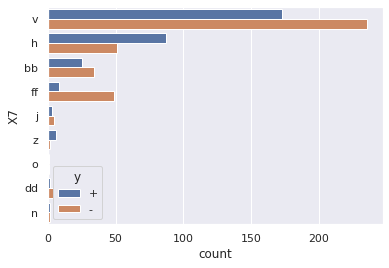

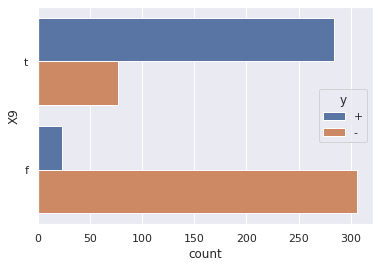

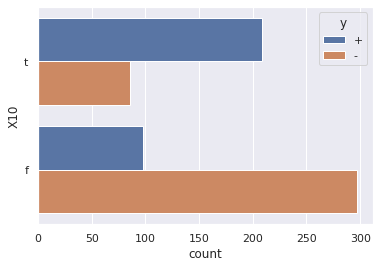

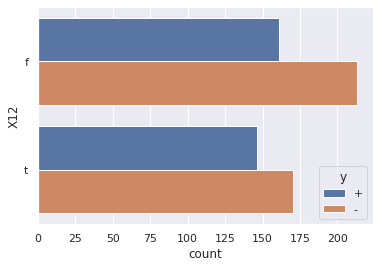

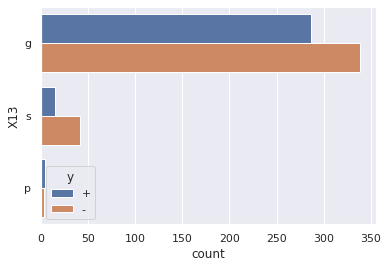

In [12]:
for variable in disc:
    if variable in ('y', 'X14'):
        continue
    sns.countplot(data = df, y = variable, hue = 'y')
    plt.show()

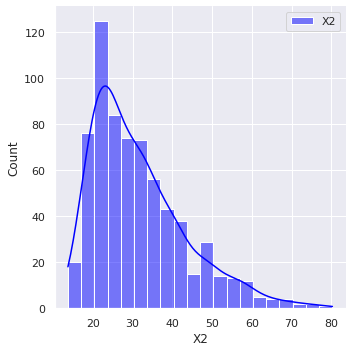

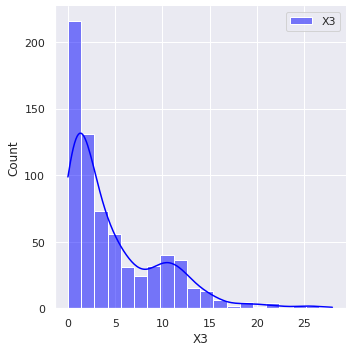

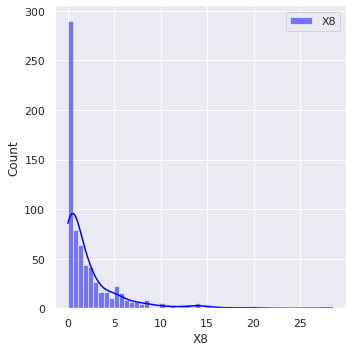

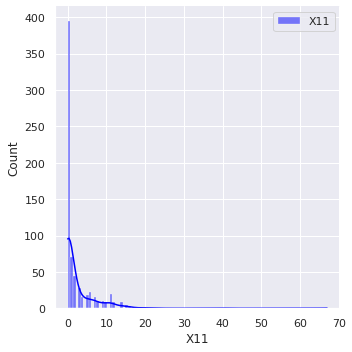

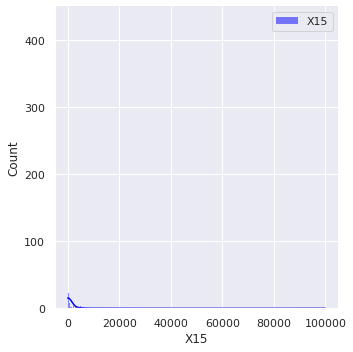

In [13]:
for variable in cont:
    sns.displot(df[variable], color = 'blue' , label = variable, kde = True)
    plt.legend()
    plt.show()

In [14]:
df['y'].replace(['+', '-'], value = [1, 0], inplace = True)

In [15]:
X = df.iloc[:, 0:15].values
y = df.iloc[:, 15].values

In [16]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3, 4, 5, 6, 12, 13])], remainder= 'passthrough')
for label_var in (0, 8, 9, 11):
    X[:, label_var] = LabelEncoder().fit_transform(X[:, label_var])
X = ct.fit_transform(X)
X = X.toarray()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [20]:
y_pred = clf.predict(X_test)
print(f'Report : {classification_report(y_test, y_pred)}') 
print (f'Accuracy = {accuracy_score(y_test, y_pred)*100}')

Report :               precision    recall  f1-score   support

           0       0.83      0.90      0.86        70
           1       0.89      0.81      0.85        68

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138

Accuracy = 85.5072463768116


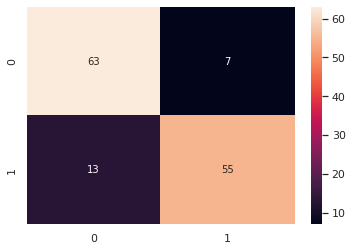

In [21]:
cf = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf, annot=True)

In [22]:
clf = LogisticRegression(random_state = 10)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(X_test)
print(f'Report : {classification_report(y_test, y_pred)}') 
print (f'Accuracy = {accuracy_score(y_test, y_pred)*100}')

Report :               precision    recall  f1-score   support

           0       0.78      0.89      0.83        70
           1       0.86      0.74      0.79        68

    accuracy                           0.81       138
   macro avg       0.82      0.81      0.81       138
weighted avg       0.82      0.81      0.81       138

Accuracy = 81.15942028985508


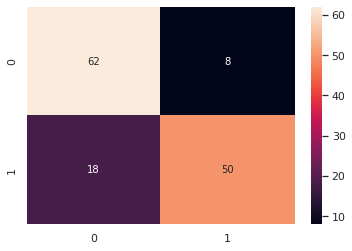

In [24]:
cf = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf, annot=True)

<hr>